In [2]:
import numpy as np
alldata = []
with open("input/5.2Potentialtopf") as fp:
    for line in fp:
        alldata.append(line.strip())
dataline_y = 0
for dataline in alldata:
    alldata[dataline_y] = dataline.split("#")[0].strip().split()
    #removes annotation of input data and splits lines into lists of individual inputs
    dataline_y += 1

if alldata[3] == ['linear']:
    alldata[3] = [0]
elif alldata[3] == ['polynomial']:
    alldata[3] = [1]
elif alldata[3] == ['cspline']:
    alldata[3] = [2]
#else:
    #alldata[3]
    #raise some kind of input error

newdata = np.zeros((len(alldata),3))
line_y = 0
for line in alldata:
    line_x = 0
    for coll in alldata[line_y]:
        newdata[line_y,line_x] = alldata[line_y][line_x]
        line_x += 1
    line_y += 1
print('input:', newdata)
#this is all just the input generator

#now to the actual stuff:

import scipy.interpolate as inter
yy, xx = newdata.shape
base = newdata[5:yy+1, 0:2]
x_data = []
y_data = [] 

pointcount = 0
for item in base:
    x_data.append(base[pointcount,0])
    y_data.append(base[pointcount,1])
    pointcount += 1

#check if that works with floats
if newdata[3,0]:
    if newdata[3,0] == 1.0:
        Vx = np.polyfit(x_data, y_data, yy - 6)
    else:
        Vx = inter.CubicSpline(x_data, y_data)
else:
    Vx = inter.interp1d(x_data, y_data, kind ='linear')

potential = np.zeros((int(newdata[1,2]),2))
XX_values = np.linspace(int(newdata[1,0]), int(newdata[1,1]), int(newdata[1,2]), endpoint=True)
delta = XX_values[1] - XX_values[0]

pointcount = 0
for item in XX_values:
    potential[pointcount,0] = item
    potential[pointcount,1] = Vx(item)
    pointcount += 1

print(potential, delta)

input: [[  2.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -2.00000000e+00   2.00000000e+00   1.99900000e+03]
 [  1.00000000e+00   3.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  6.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -2.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -5.00000000e-01   0.00000000e+00   0.00000000e+00]
 [ -5.00000000e-01  -1.00000000e+01   0.00000000e+00]
 [  5.00000000e-01  -1.00000000e+01   0.00000000e+00]
 [  5.00000000e-01   0.00000000e+00   0.00000000e+00]
 [  2.00000000e+00   0.00000000e+00   0.00000000e+00]]
[[-2.        0.      ]
 [-1.997998  0.      ]
 [-1.995996  0.      ]
 ..., 
 [ 1.995996  0.      ]
 [ 1.997998  0.      ]
 [ 2.        0.      ]] 0.002002002002


In [3]:
import numpy as np
# input: potential, delta, mass
mass = 3
delta = 0.002

V_diskr = []
for pair in potential:
    V_diskr.append(pair[1])

content = []

aa = 1 / (mass * (delta**2))

content.append(aa * V_diskr[0])
for columns in range(0, len(V_diskr)-1):   
    content.append(-0.5 * aa)
    for num in range(0, len(V_diskr)-2):
         content.append(0)
    content.append(-0.5 * aa)               
    content.append(aa * V_diskr[columns+1])
content = np.array(content)
content.shape = (len(V_diskr), len(V_diskr))
print(content)

import numpy.linalg as linalg
ew, ev = linalg.eig(content)
print(ew, ev)

[[     0.         -41666.66666667      0.         ...,      0.              0.
       0.        ]
 [-41666.66666667      0.         -41666.66666667 ...,      0.              0.
       0.        ]
 [     0.         -41666.66666667      0.         ...,      0.              0.
       0.        ]
 ..., 
 [     0.              0.              0.         ...,      0.
  -41666.66666667      0.        ]
 [     0.              0.              0.         ..., -41666.66666667
       0.         -41666.66666667]
 [     0.              0.              0.         ...,      0.
  -41666.66666667      0.        ]]
[-82336.99798435 -82390.02566663 -83332.60409574 ...,  -4001.80789601
   4012.8971365   35284.07632083] [[ -7.95639739e-03   7.74301113e-03  -2.15898432e-04 ...,   5.79600935e-36
    4.27088558e-35   6.63824745e-36]
 [ -1.57225410e-02   1.53107253e-02  -4.31793085e-04 ...,   5.56668384e-37
   -4.11326988e-36  -5.62138631e-36]
 [ -2.31127265e-02   2.25318140e-02  -6.47680182e-04 ...,  -5.742545

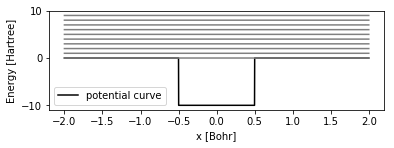

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

xx = potential[:, 0]
y1 = potential[:, 1]



#y2 = eigenwert1
plt.subplot(2, 1, 1)
plt.plot(xx, y1, color="black", label="potential curve")

ew.tolist()
for wert in ew:  #dort packen wir eine Liste mit den Eigenwerten hin
    eigenwert = []
    for xwert in potential:
        eigenwert.append(wert)
    plt.plot(xx, eigenwert, color="grey")
    
    
ev.transpose()
ev.tolist()
for vektor in ev: #dort kommt eine Liste mit Eigenvektoren hin
    plt.plot(xx, vektor, color="blue")

    

plt.xlabel("x [Bohr]")
plt.ylabel("Energy [Hartree]")
plt.legend()


vektoren² =[]
for vektor in ev:
    vektoren².append(vektor**2)
xvalues = []
for i in potential[:,1]
    xvalues.append(i)

Liste = []
for ii in len(xvalues):
    Liste.append(xvalues[ii] * vektoren²[ii])

x_mittel = delta * sum(Liste)


for wert in range(0,10):  #dort packen wir eine Liste mit den Eigenwerten hin
    eigenwert = []
    for xwert in potential:
        eigenwert.append(wert)
    if wert - lastwert < 0.002: #das müssen die eigenwerte sein
        plt.plot(xx, vektor, color="blue")
    else:
        plt.plot(xx, vektor, color="red")
    lastwert = wert



#plt.subplot(2, 1, 2)
plt.plot(xx, eigenwert, color="grey")
sigma = []
for wkeit in Liste:
    sigma.append(wkeit - x_mittel)
sum(sigma)

#plt.xlabel("Bohr]")

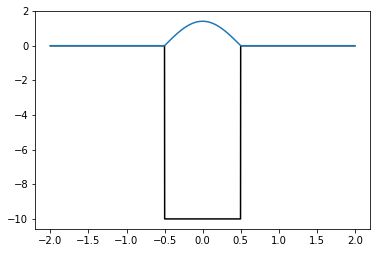

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

xx = potential[:, 0]
y1 = potential[:, 1]
plt.plot(xx, y1, color="black", label="potential curve")
aa = np.loadtxt("wavefunctions.dat")
plt.plot(xx, aa[:, 1])
#plt.plot(xx, aa[:, 2])
#plt.plot(xx, aa[:, 3])